Для 1 лаб работы по CV необходимо реализовать базовый минимум операций над изображениями
Входное изображение в формате (RGB, не чёрно-белое)
1. Фильтры

1.1 Медианный фильтр

1.2 Фильтр гаусса
2. Морфологические операции

2.1 Эрозия

2.2 Дилатация

3. Прочие операции

3.1 пороговая бинаризация (для rgb и grayscale изображения)

3.2 выравнивание гистограммы

3.3 поворот изображений на угол кратный 90 градусов


In [29]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

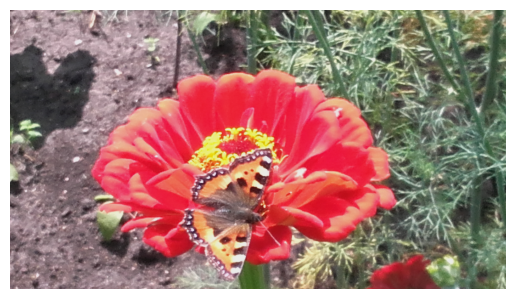

In [30]:
image1 = mpimg.imread('../Sourse_Images/butterfly_on_a_flower.jpg')
plt.imshow(image1)
plt.axis('off')  # скрыть оси
plt.show()

In [31]:
type(image1)

numpy.ndarray

In [32]:
print(f"Размер: {image1.shape}")
print(f"Тип данных: {image1.dtype}")

Размер: (1836, 3264, 3)
Тип данных: uint8


In [33]:
#%matplotlib inline

In [34]:
image1.shape[1]

3264

3.3 Поворот изображения на угол кратный 90&deg;

In [ ]:
def Rotate(image: np.ndarray, angle: int) -> np.ndarray:

    if(angle % 360 == 0):
        return image.copy().astype(np.uint8)
    elif(angle % 360 == 270):
        H = image.shape[1]
        W = image.shape[0]
        K = image.shape[2]
        res_image = np.zeros((H, W, K))
        #res_image = np.zeros((H, W, K), dtype=image.dtype)
        for k in range(K):
            for i in range(H):
                for j in range(W):
                    res_image[i][j][k] = image[W-1-j][i][k]
    else:
        ####Error
        return np.zeros((image.shape[0], image.shape[1], image.shape[2])).astype(np.uint8)
    
    return res_image.astype(np.uint8)


In [44]:
img2 = Rotate(image1, 90)

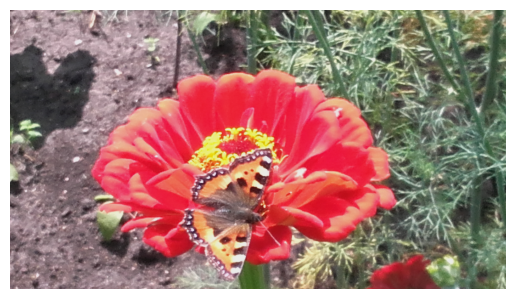

In [42]:
plt.imshow(image1)
plt.axis('off')  # скрыть оси
plt.show()

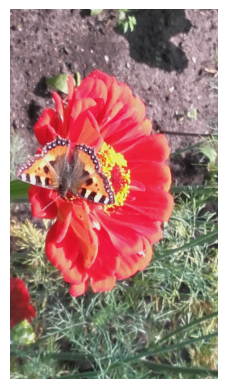

In [45]:
plt.imshow(img2)
plt.axis('off')  # скрыть оси
plt.show()

In [ ]:
def Rotate(image: np.ndarray, angle: int) -> np.ndarray:
    """
    Универсальная функция поворота
    """
    if angle % 90 != 0:
        raise ValueError("Угол должен быть кратен 90 градусам")
    
    k = (angle // 90) % 4
    return np.rot90(image, k=k)

In [ ]:
#cv2.imwrite('output.jpg', image)